In [8]:
import sys
sys.path.append('../n-trees/')
import numpy as np
import torch
import matplotlib.pyplot as plt
import dataset

In [2]:
forests = dataset.ForestDataset(5, 1, 1, 10000, 1000)

In [3]:
from torch.utils.data import DataLoader

In [4]:
dataloader = DataLoader(forests, batch_size=4, shuffle=True, num_workers=4)

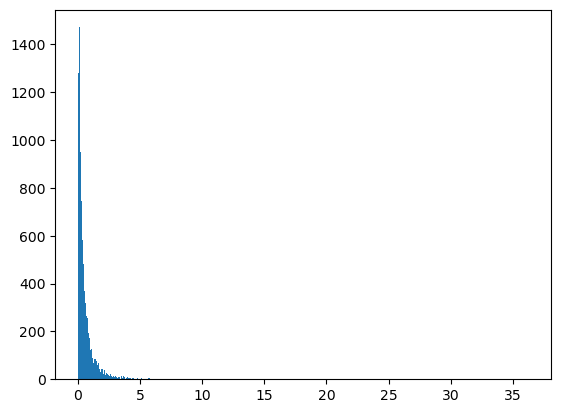

tensor(0.0171)

In [246]:
rnd_normal = torch.randn([10000])
sigma = (rnd_normal * 1.2 - 1.2).exp()
plt.hist(sigma, bins=500)
plt.show()
torch.mean(sigma)/max(sigma)

In [248]:
weight = (sigma ** 2 + 0.5 ** 2) / (sigma * 0.5) ** 2

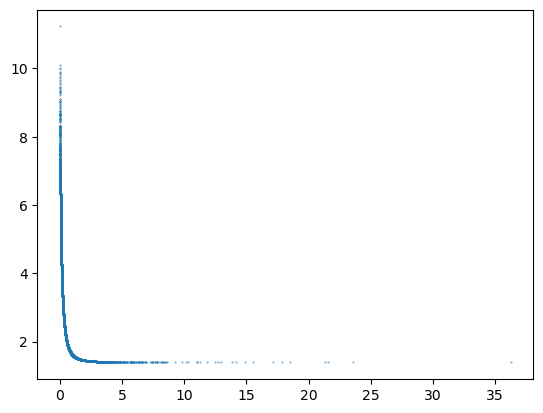

In [249]:
plt.scatter(sigma, torch.log(weight), s=0.1)

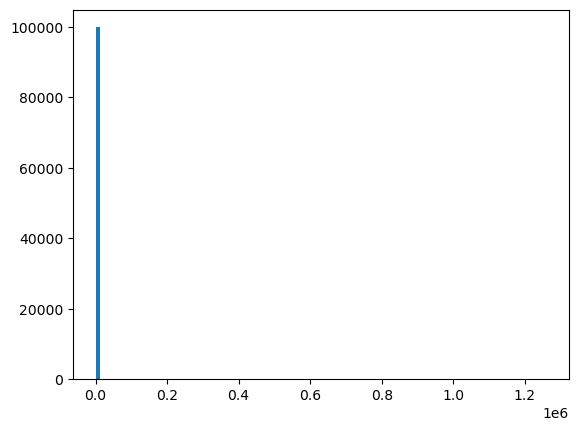

In [237]:
plt.hist(weight, bins=100)
plt.show()

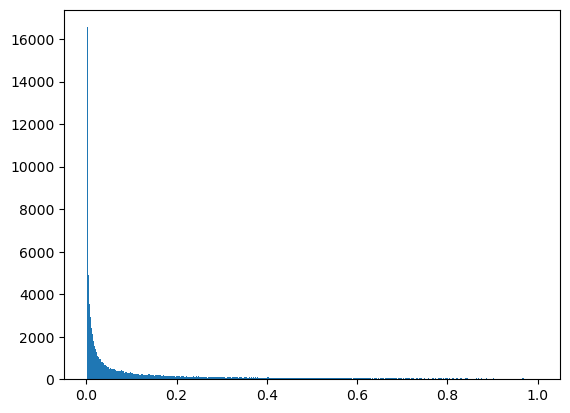

tensor(0.1430)

In [202]:
uniform_rand = torch.rand([100000]) * 7
p = (uniform_rand * -1).exp() / 2
plt.hist(p, bins=500)
plt.show()
torch.mean(p)

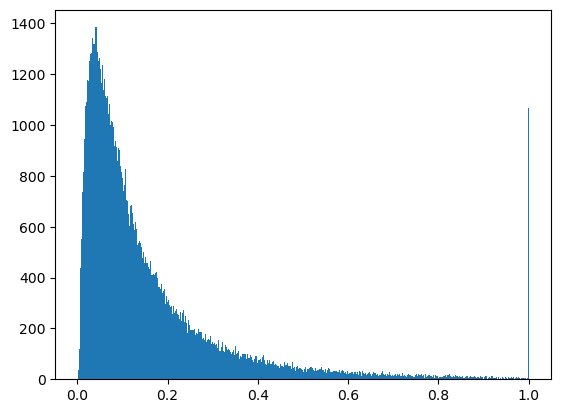

tensor(0.1600)

In [340]:
rnd_normal = torch.randn([100000]) * 1
p = rnd_normal.exp()
p = (p / 10).clamp(0, 1)
plt.hist(p, bins=500)
plt.show()
torch.mean(p)

In [263]:
np.where(p == 1)

(array([12890, 39250, 42446, 58218, 65949]),)

In [336]:
rnd_normal = torch.randn([1000, 1,1,1]) * 1
p = rnd_normal.exp()
p = (p / 10).clamp(0, 1) / 2

In [337]:
flips = torch.bernoulli(torch.ones((1000, 1,100,100)) * (1 - p))

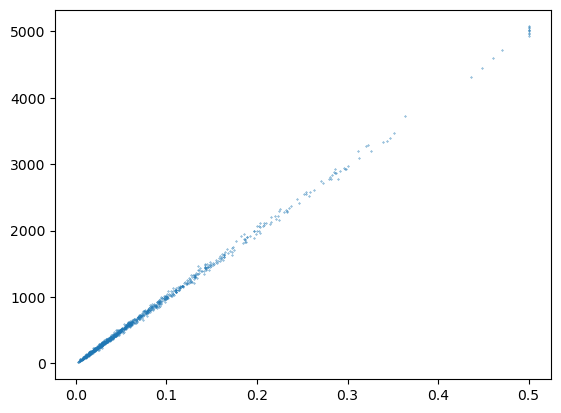

In [339]:
plt.scatter(p[:,0,0,0],100*100-torch.sum(flips, (1,2,3)), s=0.1)